## Project Overview

A machine learning project that predicts residential property prices based on key features using Linear Regression. This project analyzes 1,460 houses from the Ames Housing Dataset to build an accurate predictive model for real estate pricing.

### Key Features
- Predicts house prices based on square footage, bedrooms, and bathrooms
- Comprehensive data preprocessing and feature engineering
- Multiple evaluation metrics (R², RMSE, MAE)
- Professional visualizations and insights
- Ready-to-use prediction pipeline


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 60)
print("HOUSE PRICE PREDICTION - LINEAR REGRESSION MODEL")
print("=" * 60)

HOUSE PRICE PREDICTION - LINEAR REGRESSION MODEL


In [3]:
# Load the dataset
print("\n1. Loading Dataset...")
df = pd.read_csv(r"C:\Users\BDO NARKANDA\Downloads\train.csv")
print(f"   Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")



1. Loading Dataset...
   Dataset loaded successfully: 1460 rows, 81 columns


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Select relevant features
print("\n2. Feature Selection...")
print("   Selected Features:")
print("   - GrLivArea (Square Footage)")
print("   - BedroomAbvGr (Number of Bedrooms)")
print("   - FullBath + HalfBath (Total Bathrooms)")



2. Feature Selection...
   Selected Features:
   - GrLivArea (Square Footage)
   - BedroomAbvGr (Number of Bedrooms)
   - FullBath + HalfBath (Total Bathrooms)


In [6]:
# Create total bathroom feature (combining full and half baths)
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath'])

In [7]:
# Select features and target
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']
target = 'SalePrice'

In [8]:
# Check for missing values
print("\n3. Data Quality Check...")
missing_values = df[features + [target]].isnull().sum()
print(f"   Missing values:\n{missing_values}")


3. Data Quality Check...
   Missing values:
GrLivArea         0
BedroomAbvGr      0
TotalBathrooms    0
SalePrice         0
dtype: int64


In [9]:

# Remove rows with missing values
df_clean = df[features + [target]].dropna()
print(f"   Clean dataset: {df_clean.shape[0]} rows")

   Clean dataset: 1460 rows


In [10]:
# Prepare X and y
X = df_clean[features]
y = df_clean[target]

In [11]:

# Display basic statistics
print("\n4. Dataset Statistics...")
print("\n" + "=" * 60)
print(df_clean[features + [target]].describe().round(2).to_string())
print("=" * 60)


4. Dataset Statistics...

       GrLivArea  BedroomAbvGr  TotalBathrooms  SalePrice
count    1460.00       1460.00         1460.00     1460.0
mean     1515.46          2.87            1.76   180921.2
std       525.48          0.82            0.64    79442.5
min       334.00          0.00            0.00    34900.0
25%      1129.50          2.00            1.00   129975.0
50%      1464.00          3.00            2.00   163000.0
75%      1776.75          3.00            2.50   214000.0
max      5642.00          8.00            3.50   755000.0


In [12]:

# Split the data
print("\n5. Splitting Dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Testing set: {X_test.shape[0]} samples")


5. Splitting Dataset...
   Training set: 1168 samples
   Testing set: 292 samples


In [13]:

# Train the model
print("\n6. Training Linear Regression Model...")
model = LinearRegression()
model.fit(X_train, y_train)
print("   Model trained successfully!")


6. Training Linear Regression Model...
   Model trained successfully!


In [14]:
# Model coefficients
print("\n7. Model Coefficients...")
print("   " + "=" * 50)
print(f"   Intercept: ${model.intercept_:,.2f}")
for feature, coef in zip(features, model.coef_):
    print(f"   {feature}: ${coef:,.2f}")
print("   " + "=" * 50)


7. Model Coefficients...
   Intercept: $56,862.58
   GrLivArea: $100.64
   BedroomAbvGr: $-26,645.53
   TotalBathrooms: $27,083.21


In [15]:
# Interpretation
print("\n   Interpretation:")
print(f"   - Each additional sq ft adds ${model.coef_[0]:.2f} to price")
print(f"   - Each additional bedroom adds ${model.coef_[1]:,.2f} to price")
print(f"   - Each additional bathroom adds ${model.coef_[2]:,.2f} to price")


   Interpretation:
   - Each additional sq ft adds $100.64 to price
   - Each additional bedroom adds $-26,645.53 to price
   - Each additional bathroom adds $27,083.21 to price


In [16]:
# Make predictions
print("\n8. Making Predictions...")
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


8. Making Predictions...


In [17]:
# Evaluate the model
print("\n9. Model Performance Metrics...")
print("\n   TRAINING SET:")
print("   " + "-" * 50)
print(f"   R² Score: {r2_score(y_train, y_train_pred):.4f}")
print(f"   RMSE: ${np.sqrt(mean_squared_error(y_train, y_train_pred)):,.2f}")
print(f"   MAE: ${mean_absolute_error(y_train, y_train_pred):,.2f}")

print("\n   TESTING SET:")
print("   " + "-" * 50)
print(f"   R² Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"   RMSE: ${np.sqrt(mean_squared_error(y_test, y_test_pred)):,.2f}")
print(f"   MAE: ${mean_absolute_error(y_test, y_test_pred):,.2f}")
print("   " + "-" * 50)



9. Model Performance Metrics...

   TRAINING SET:
   --------------------------------------------------
   R² Score: 0.5623
   RMSE: $51,092.94
   MAE: $35,269.01

   TESTING SET:
   --------------------------------------------------
   R² Score: 0.6286
   RMSE: $53,371.56
   MAE: $36,569.64
   --------------------------------------------------


In [18]:
# Create visualizations
print("\n10. Generating Visualizations...")


10. Generating Visualizations...


   Visualizations saved as 'house_price_model_analysis.png'


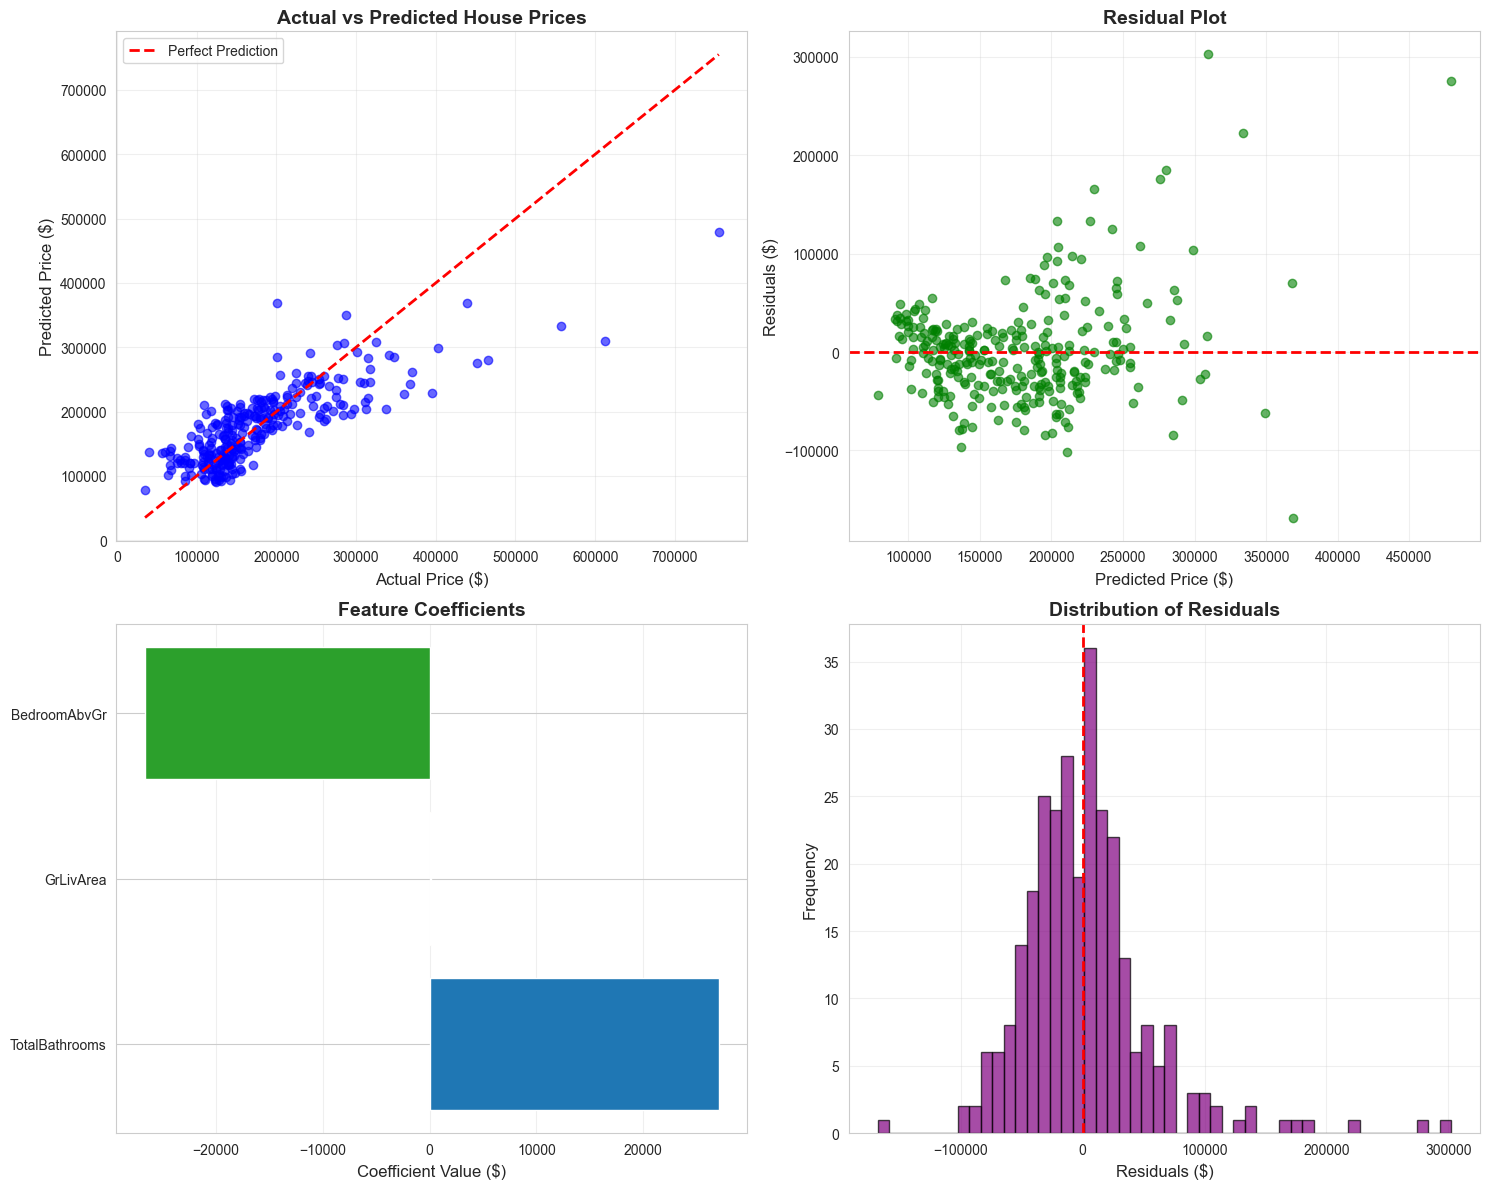

In [19]:
# 1. Actual vs Predicted
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0, 0].set_title('Actual vs Predicted House Prices', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals Plot
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price ($)', fontsize=12)
axes[0, 1].set_ylabel('Residuals ($)', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

axes[1, 0].barh(feature_importance['Feature'], feature_importance['Coefficient'], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 0].set_xlabel('Coefficient Value ($)', fontsize=12)
axes[1, 0].set_title('Feature Coefficients', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')


# 4. Residuals Distribution
axes[1, 1].hist(residuals, bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Residuals ($)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('house_price_model_analysis.png', dpi=300, bbox_inches='tight')
print("   Visualizations saved as 'house_price_model_analysis.png'")

In [20]:
# Example predictions
print("\n11. Example Predictions...")
print("   " + "=" * 70)
examples = pd.DataFrame({
    'GrLivArea': [1500, 2000, 2500],
    'BedroomAbvGr': [3, 4, 4],
    'TotalBathrooms': [2.0, 2.5, 3.0]
})

predictions = model.predict(examples)
print("\n   Sample House Predictions:")
for i, (idx, row) in enumerate(examples.iterrows()):
    print(f"\n   House {i+1}:")
    print(f"   - Square Footage: {row['GrLivArea']:,.0f} sq ft")
    print(f"   - Bedrooms: {row['BedroomAbvGr']:.0f}")
    print(f"   - Bathrooms: {row['TotalBathrooms']:.1f}")
    print(f"   → Predicted Price: ${predictions[i]:,.2f}")
print("   " + "=" * 70)


11. Example Predictions...

   Sample House Predictions:

   House 1:
   - Square Footage: 1,500 sq ft
   - Bedrooms: 3
   - Bathrooms: 2.0
   → Predicted Price: $182,047.74

   House 2:
   - Square Footage: 2,000 sq ft
   - Bedrooms: 4
   - Bathrooms: 2.5
   → Predicted Price: $219,262.26

   House 3:
   - Square Footage: 2,500 sq ft
   - Bedrooms: 4
   - Bathrooms: 3.0
   → Predicted Price: $283,122.31


In [21]:
# Save the model results
results_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': y_test_pred,
    'Residual': residuals,
    'Square_Footage': X_test['GrLivArea'].values,
    'Bedrooms': X_test['BedroomAbvGr'].values,
    'Bathrooms': X_test['TotalBathrooms'].values
})
results_df.to_csv('model_predictions.csv', index=False)
print("\n12. Results saved to 'model_predictions.csv'")

print("\n" + "=" * 60)
print("MODEL TRAINING COMPLETED SUCCESSFULLY!")
print("=" * 60)
print("\nKey Takeaways:")
print(f"✓ Model explains {r2_score(y_test, y_test_pred)*100:.2f}% of price variance")
print(f"✓ Average prediction error: ${mean_absolute_error(y_test, y_test_pred):,.2f}")
print(f"✓ Model is ready for house price predictions!")
print("=" * 60)

plt.show()


12. Results saved to 'model_predictions.csv'

MODEL TRAINING COMPLETED SUCCESSFULLY!

Key Takeaways:
✓ Model explains 62.86% of price variance
✓ Average prediction error: $36,569.64
✓ Model is ready for house price predictions!
